In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('movie_statistic_dataset.csv')

In [3]:
df.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


In [4]:
df = df.drop('genres', axis=1).join(df['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))

In [5]:
df.dtypes

movie_title              object
production_date          object
runtime_minutes         float64
director_name            object
director_professions     object
director_birthYear       object
director_deathYear       object
movie_averageRating     float64
movie_numerOfVotes      float64
approval_Index          float64
Production budget $       int64
Domestic gross $          int64
Worldwide gross $         int64
genres                   object
dtype: object

In [6]:
df.head()

,movie_title,production_date,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,genres
0,Avatar: The Way of Water,2022-12-09,192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552,Action
0,Avatar: The Way of Water,2022-12-09,192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552,Adventure
0,Avatar: The Way of Water,2022-12-09,192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552,Fantasy
1,Avengers: Endgame,2019-04-23,181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755,Action
1,Avengers: Endgame,2019-04-23,181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755,Adventure


In [7]:
genre_counts = df['genres'].value_counts()
print(genre_counts)

genres
Drama          2210
Comedy         1656
Action         1211
Adventure       968
Crime           780
Romance         724
Thriller        668
Horror          456
Mystery         409
Sci-Fi          379
Fantasy         350
Biography       338
Family          265
Animation       241
History         149
Music           145
Sport           114
War              86
Documentary      67
Musical          56
Western          44
Film-Noir         7
\N                2
News              1
Name: count, dtype: int64


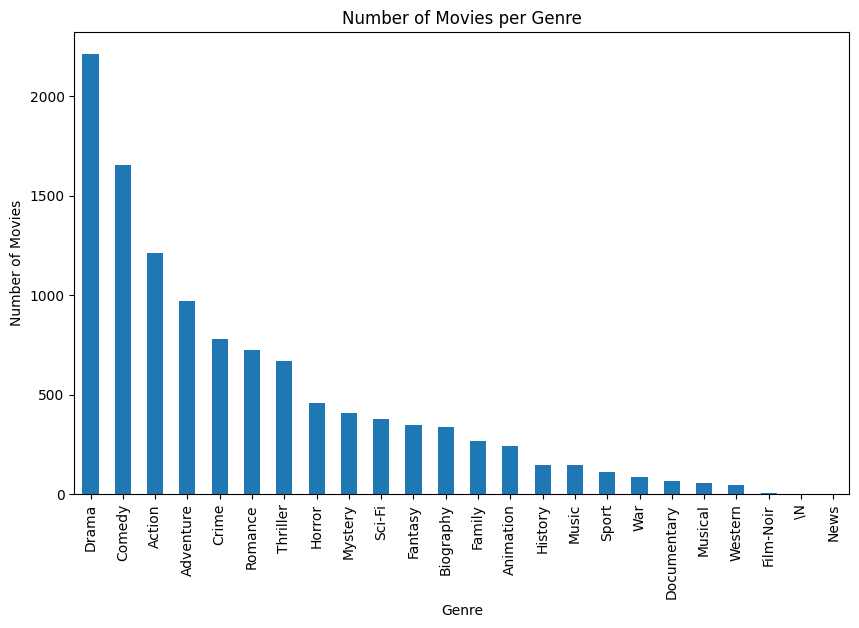

In [8]:
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

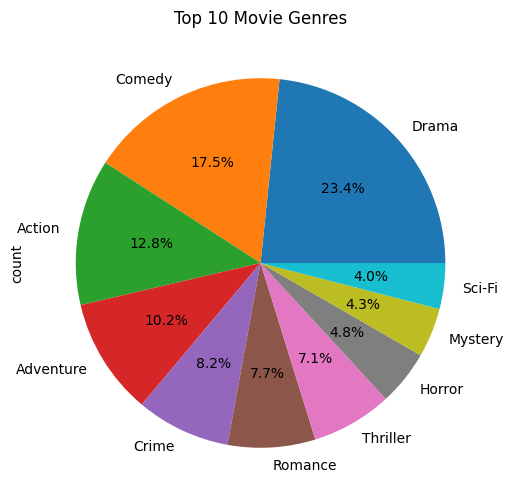

In [9]:
plt.figure(figsize=(10,6))
genre_counts[:10].plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Movie Genres')
plt.show()

In [10]:
genre_financial_data = df.groupby('genres').agg({
    'Domestic gross $': 'mean',
    'Worldwide gross $': 'mean'
}).reset_index()

In [11]:
print(genre_financial_data.head())

      genres  Domestic gross $  Worldwide gross $
0     Action      7.808299e+07       1.904797e+08
1  Adventure      9.959526e+07       2.536851e+08
2  Animation      1.197795e+08       3.046821e+08
3  Biography      3.442383e+07       6.294655e+07
4     Comedy      5.209332e+07       1.035291e+08


C:\Users\BIT\AppData\Local\Temp\ipykernel_17444\575866179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Domestic gross $', y='genres', data=genre_financial_data, palette='viridis')


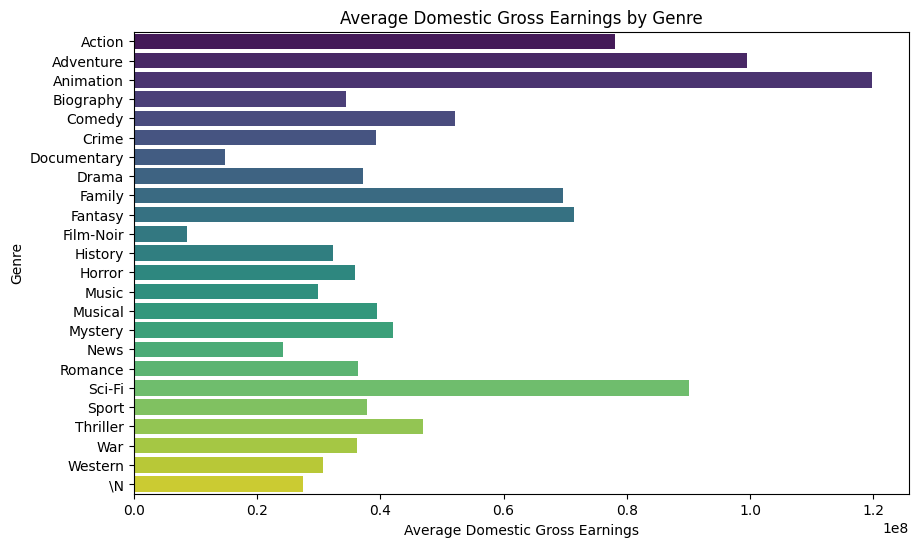

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='Domestic gross $', y='genres', data=genre_financial_data, palette='viridis')
plt.title('Average Domestic Gross Earnings by Genre')
plt.xlabel('Average Domestic Gross Earnings')
plt.ylabel('Genre')
plt.show()

C:\Users\BIT\AppData\Local\Temp\ipykernel_17444\2349458206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Worldwide gross $', y='genres', data=genre_financial_data, palette='viridis')


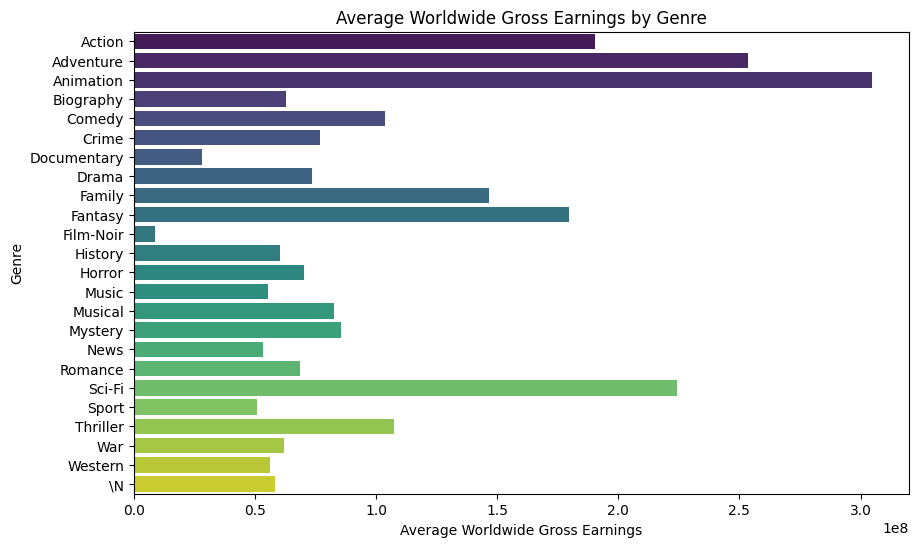

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x='Worldwide gross $', y='genres', data=genre_financial_data, palette='viridis')
plt.title('Average Worldwide Gross Earnings by Genre')
plt.xlabel('Average Worldwide Gross Earnings')
plt.ylabel('Genre')
plt.show()

In [14]:
# Convert 'production_date' to datetime
df['production_date'] = pd.to_datetime(df['production_date'])

# Extract the year
df['year'] = df['production_date'].dt.year

In [17]:
genre_year_data = df.groupby(['year', 'genres']).size().reset_index(name='count')
print(genre_year_data.head())

   year     genres  count
0  1915      Drama      1
1  1915        War      1
2  1916     Action      1
3  1916  Adventure      1
4  1916     Sci-Fi      1


In [18]:
genre_year_pivot = genre_year_data.pivot(index='year', columns='genres', values='count').fillna(0)
print(genre_year_pivot.head())

genres  Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
year                                                                          
1915       0.0        0.0        0.0        0.0     0.0    0.0          0.0   
1916       1.0        1.0        0.0        0.0     0.0    0.0          0.0   
1920       0.0        0.0        0.0        0.0     0.0    1.0          0.0   
1925       0.0        1.0        0.0        0.0     0.0    0.0          0.0   
1929       0.0        0.0        0.0        0.0     0.0    0.0          0.0   

genres  Drama  Family  Fantasy  ...  Musical  Mystery  News  Romance  Sci-Fi  \
year                            ...                                            
1915      1.0     0.0      0.0  ...      0.0      0.0   0.0      0.0     0.0   
1916      0.0     0.0      0.0  ...      0.0      0.0   0.0      0.0     1.0   
1920      1.0     0.0      0.0  ...      0.0      0.0   0.0      0.0     0.0   
1925      2.0     0.0      0.0  ...      0.0  

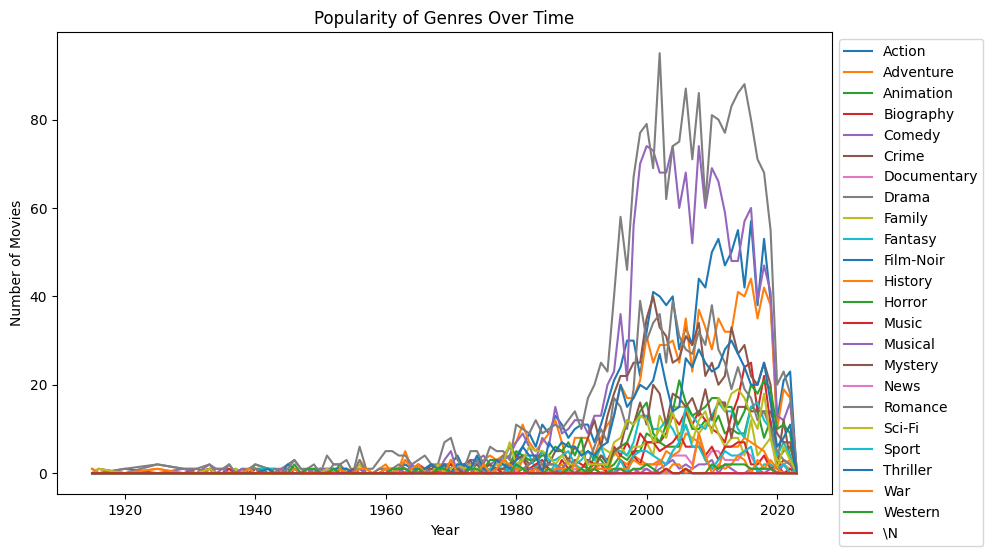

In [19]:
plt.figure(figsize=(10,6))
for genre in genre_year_pivot.columns:
    plt.plot(genre_year_pivot.index, genre_year_pivot[genre], label=genre)
plt.title('Popularity of Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

<Figure size 1000x600 with 0 Axes>

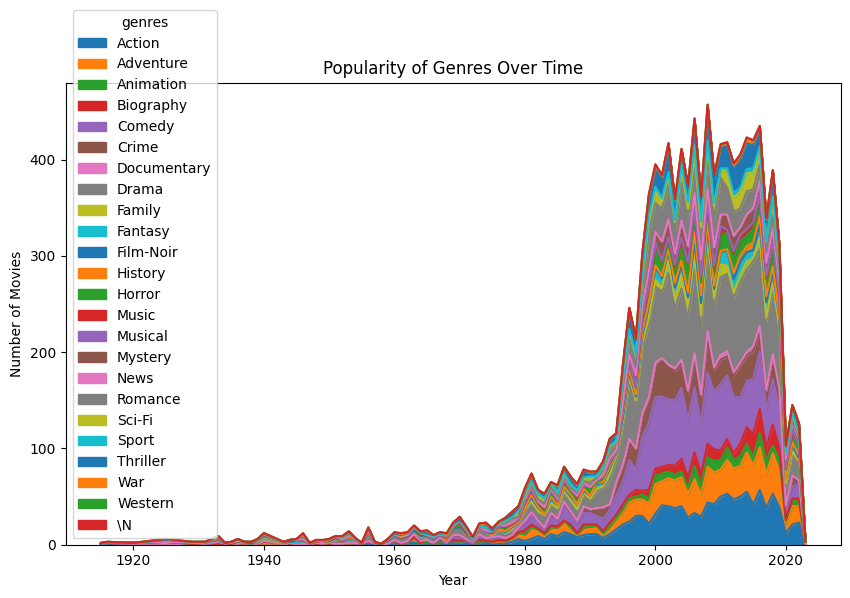

In [20]:
plt.figure(figsize=(10,6))
genre_year_pivot.plot(kind='area', stacked=True, figsize=(10,6))
plt.title('Popularity of Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()